In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import csv

In [8]:
# read in data
df = pd.read_csv('../Data/cardio_train.csv', delimiter=';')
print(df.head())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [9]:
df_feat = df.iloc[:,1:-1] # eventhing but last column
target = df.iloc[:,-1] #last column

df_feat.head() # age in days

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0


In [10]:
from sklearn.preprocessing import StandardScaler
# standardize: mean = 0, std = 1
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_feat)
scaled_features.shape # np array
print(scaled_features)

# citation: https://realpython.com/k-means-clustering-python/

[[-0.43606151  1.36405487  0.44345206 ... -0.31087913 -0.23838436
   0.49416711]
 [ 0.30768633 -0.73310834 -1.01816804 ... -0.31087913 -0.23838436
   0.49416711]
 [-0.24799666 -0.73310834  0.07804703 ... -0.31087913 -0.23838436
  -2.02360695]
 ...
 [-0.16328642  1.36405487  2.27047718 ... -0.31087913  4.19490608
  -2.02360695]
 [ 1.20058905 -0.73310834 -0.16555632 ... -0.31087913 -0.23838436
  -2.02360695]
 [ 0.43414373 -0.73310834  0.68705541 ... -0.31087913 -0.23838436
   0.49416711]]


In [13]:
max_clusters = 20

centers = [] # store centers
errors = [] # SSE

# store errors

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

for i in range(1,max_clusters+1):
    kmeans = KMeans(n_clusters=i, **kmeans_kwargs)  
    kmeans.fit(scaled_features)
    centers.append(kmeans.cluster_centers_) # centers
    errors.append(kmeans.inertia_) # errors
    #print(kmeans.inertia_)

 

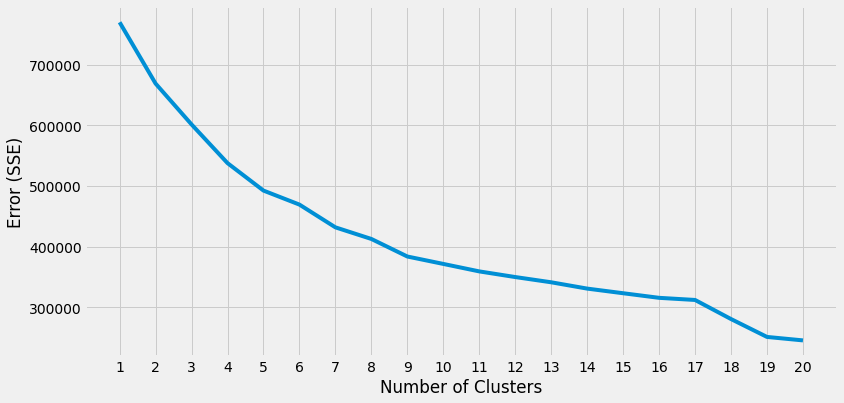

In [14]:
# plot results (N on error)
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12, 6))
plt.plot(range(1, max_clusters+1), errors)
plt.xticks(range(1, max_clusters+1))
plt.xlabel("Number of Clusters")
plt.ylabel("Error (SSE)")
plt.show()

In [15]:
from kneed import KneeLocator
# find optimal number of clusters
kl = KneeLocator(
    range(1, max_clusters+1), errors, curve="convex", direction="decreasing"
)

opt_n = kl.elbow # 9 


In [ ]:
opt_n = 9
# for optimal number of clusters opt_n = 9
kmeans = KMeans(
    init="random",
    n_clusters=opt_n,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(scaled_features)
error = kmeans.inertia_
labels = kmeans.labels_[:] # get labels # (70000,)
# sum counts 1 to opt_n --> size of clusters

In [ ]:
df['label'] = labels
df.head()

In [ ]:
csv_name = "group" + str(i)

for i in range(9):
  csv_name = "Cluster" + str(i)
  dfx = df[df['label'] == i]
  dfx.drop(labels = "label", axis = 1).to_csv(csv_name)
  print(dfx.head())

In [ ]:
import numpy as np
# check size of clusters 

cluster_sizes = np.zeros(opt_n)
for label in labels:
    cluster_sizes[label]+=1

print(cluster_sizes) # size of clusters decreasing [4,7,8,0]

# FUNCTION: cluster_id by size (decreasing) [TODO]

Feature selection: ANOVA F-test

Some ideas:
- Establish a baseline performance with all features
- Try separate feature selection method for each input type
- Try wrapper method (e.g. RFE) agnostic to input type

In [ ]:
# visualize 
# FIND two dimensions (features) to visualize [TODO]
# **most distinct/different between clusters (scientific way)

# PLOT [TODO]

# test: age on ap_lo (blood pressure)

In [ ]:
# pick three largest clusters (most data points) out of optimal sorting to train models on + general model
# Note: may only be working on subset of data

# separate top clusters into separate data frames [TODO]
## interpret clusters [TODO] - feature summaries for each

Models to try for binary classification
- penalized logistic regression
    - L1-norm ("lasso"), L2-norm ("ridge"), a combination of the two ("elastic"), or a penalty associated to groups of variables ("group lasso").
- random forest